### Block 1: Importer les bibliothèques

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

### Block 2: Créer et visualiser les données initiales

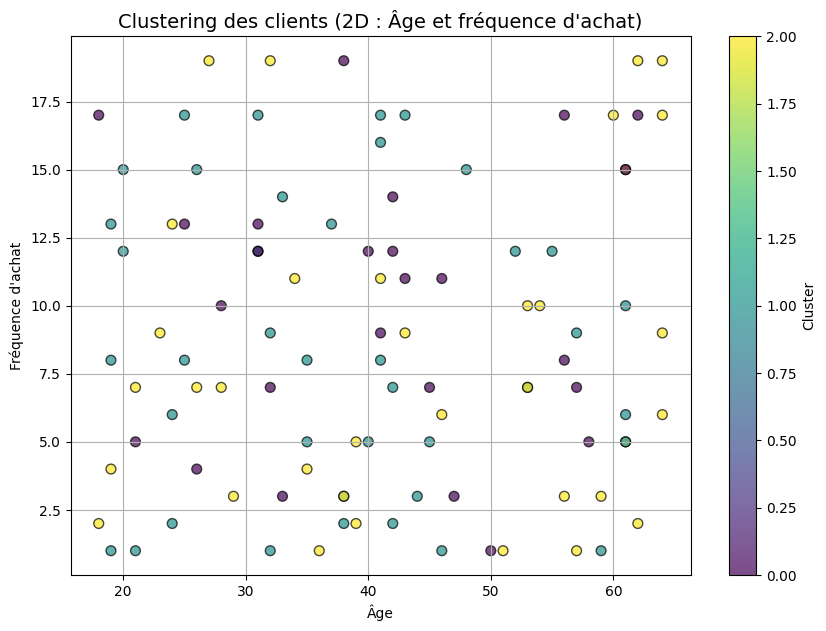

In [13]:
# Génération de données synthétiques pour simuler les comportements des clients
np.random.seed(42)  # Pour des résultats reproductibles

# Génération de 100 clients avec des caractéristiques aléatoires
n_clients = 100
ages = np.random.randint(18, 65, size=n_clients)  # Âge entre 18 et 65 ans
purchase_frequencies = np.random.randint(1, 20, size=n_clients)  # Fréquence d'achat entre 1 et 20
average_spends = np.random.randint(10, 200, size=n_clients)  # Dépense moyenne entre 10€ et 200€

# Création d'un DataFrame
data = {
    "Age": ages,
    "Purchase frequency": purchase_frequencies,
    "Average spend (€)": average_spends,
}
customers = pd.DataFrame(data)

# Application de K-means avec 3 clusters pour mieux identifier des groupes
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customers)

# Ajout des labels de clusters au DataFrame
customers["Cluster"] = kmeans.labels_

# Visualisation des clusters en 2D (âge et fréquence d'achat)
plt.figure(figsize=(10, 7))
plt.scatter(
    customers["Age"],
    customers["Purchase frequency"],
    c=customers["Cluster"],
    cmap="viridis",
    s=50,
    alpha=0.7,
    edgecolor="k",
)
plt.title("Clustering des clients (2D : Âge et fréquence d'achat)", fontsize=14)
plt.xlabel("Âge")
plt.ylabel("Fréquence d'achat")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

### Block 3: Affichage des clusters

In [14]:
# Affichage des premiers résultats
print("Aperçu des clusters :")
print(customers.head())

Aperçu des clusters :
   Age  Purchase frequency  Average spend (€)  Cluster
0   56                   8                 33        0
1   46                  11                 78        0
2   32                  19                125        2
3   60                  17                107        2
4   25                   8                148        1


### Block 4: Visualisation des clusters en 3D (dans un onglet d'une page internet)

In [15]:
# Configurer Plotly pour afficher dans le navigateur
pio.renderers.default = "browser"

# Génération de données synthétiques pour simuler les comportements des clients
np.random.seed(42)

# Génération de 100 clients avec des caractéristiques aléatoires
n_clients = 100
ages = np.random.randint(18, 65, size=n_clients)  # Âge entre 18 et 65 ans
purchase_frequencies = np.random.randint(1, 20, size=n_clients)  # Fréquence d'achat entre 1 et 20
average_spends = np.random.randint(10, 200, size=n_clients)  # Dépense moyenne entre 10€ et 200€

# Création d'un DataFrame
data = {
    "Age": ages,
    "Purchase frequency": purchase_frequencies,
    "Average spend (€)": average_spends,
}
customers = pd.DataFrame(data)

# Application de K-means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customers)

# Ajout des labels de clusters
customers["Cluster"] = kmeans.labels_

# Visualisation interactive en 3D avec Plotly
fig = px.scatter_3d(
    customers,
    x="Age",
    y="Purchase frequency",
    z="Average spend (€)",
    color="Cluster",
    title="Clustering des clients (Visualisation 3D interactive)",
    labels={"Age": "Âge", "Purchase frequency": "Fréquence d'achat", "Average spend (€)": "Dépense moyenne (€)"},
)
fig.update_traces(marker=dict(size=6))
fig.show()
